# Lesson 4 - Collaborative Filtering

In [1]:
from fastai.collab import *
from fastai.tabular import *

## Collaborative filtering example

`collab` models use data in a `DataFrame` of user, items, and ratings.

In [2]:
user, item, title = 'userId', 'movieId', 'title'

In [3]:
path = untar_data(URLs.ML_SAMPLE) # MovieLens dataset sample

In [4]:
path

PosixPath('/home/cedric/.fastai/data/movie_lens_sample')

In [5]:
ratings = pd.read_csv(path / 'ratings.csv')

In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


That's all we need to create and train a model:

In [7]:
data = CollabDataBunch.from_df(ratings, seed=42)

In [8]:
y_range = [0, 5.5]

In [9]:
# Create a Learner for collaborative filtering on data
learn = collab_learner(data, n_factors=50, y_range=y_range)

In [14]:
%%time

learn.fit_one_cycle(3, 5e-3)

epoch,train_loss,valid_loss
1,1.618773,0.981229
2,0.854903,0.678677
3,0.653128,0.667750


CPU times: user 801 ms, sys: 1.6 s, total: 2.4 s
Wall time: 2.77 s


## Movielens 100k

Let's try with the full Movielens 100k data dataset, available from http://files.grouplens.org/datasets/movielens/ml-100k.zip

In [10]:
path = Path('data/ml-100k/')

In [36]:
!wget http://files.grouplens.org/datasets/movielens/ml-100k.zip -O data/ml-100k.zip

--2018-12-27 02:48:45--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.34.235
Connecting to files.grouplens.org (files.grouplens.org)|128.101.34.235|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘data/ml-100k.zip’

data/ml-100k.zip    100%[===================>]   4.70M  3.46MB/s    in 1.4s    

2018-12-27 02:48:47 (3.46 MB/s) - ‘data/ml-100k.zip’ saved [4924029/4924029]



In [39]:
!unzip data/ml-100k.zip -d data

Archive:  data/ml-100k.zip
   creating: data/ml-100k/
  inflating: data/ml-100k/allbut.pl  
  inflating: data/ml-100k/mku.sh     
  inflating: data/ml-100k/README     
  inflating: data/ml-100k/u.data     
  inflating: data/ml-100k/u.genre    
  inflating: data/ml-100k/u.info     
  inflating: data/ml-100k/u.item     
  inflating: data/ml-100k/u.occupation  
  inflating: data/ml-100k/u.user     
  inflating: data/ml-100k/u1.base    
  inflating: data/ml-100k/u1.test    
  inflating: data/ml-100k/u2.base    
  inflating: data/ml-100k/u2.test    
  inflating: data/ml-100k/u3.base    
  inflating: data/ml-100k/u3.test    
  inflating: data/ml-100k/u4.base    
  inflating: data/ml-100k/u4.test    
  inflating: data/ml-100k/u5.base    
  inflating: data/ml-100k/u5.test    
  inflating: data/ml-100k/ua.base    
  inflating: data/ml-100k/ua.test    
  inflating: data/ml-100k/ub.base    
  inflating: data/ml-100k/ub.test    


In [11]:
ratings = pd.read_csv(path / 'u.data', delimiter='\t', header=None,
                      names=[user, item, 'rating', 'timestamp'])

In [12]:
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [13]:
movies = pd.read_csv(path / 'u.item', delimiter='|', encoding='latin-1', header=None,
                     names=[item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])

In [14]:
movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,...,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
len(ratings)

100000

In [16]:
rating_movie = ratings.merge(movies[[item, title]])

In [17]:
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [18]:
data = CollabDataBunch.from_df(rating_movie, seed=42, pct_val=0.1, item_name=title)

In [19]:
data.show_batch()

userId,title,target
253,It's a Wonderful Life (1946),5.0
393,Stand by Me (1986),3.0
334,"Nightmare Before Christmas, The (1993)",4.0
692,Monty Python and the Holy Grail (1974),2.0
314,So I Married an Axe Murderer (1993),2.0


In [20]:
y_range = [0,5.5]

In [21]:
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


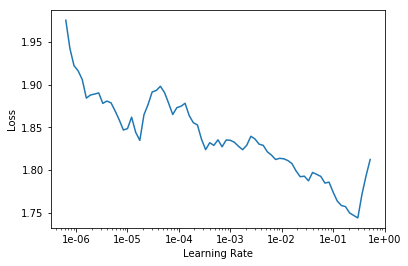

In [22]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [23]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss
1,0.948704,0.934008
2,0.859583,0.888070
3,0.755054,0.836295
4,0.642712,0.811974
5,0.563031,0.810624


In [24]:
learn.save('dotprod')

Here's [some benchmarks](https://www.librec.net/release/v1.3/example.html) on the same dataset for the popular Librec system for collaborative filtering. They show best results based on RMSE of 0.91, which corresponds to an MSE of `0.91**2 = 0.83`.

## Interpretation

### Setup

In [25]:
learn.load('dotprod');

In [26]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

In [27]:
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [28]:
g = rating_movie.groupby(title)['rating'].count()

In [30]:
top_movies = g.sort_values(ascending=False).index.values[:1000]

In [32]:
top_movies[:10]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

### Movie bias

In [34]:
movie_bias = learn.bias(top_movies, is_item=True)
movie_bias.shape

torch.Size([1000])

In [35]:
mean_ratings = rating_movie.groupby(title)['rating'].mean()

In [37]:
movie_ratings = [(b, i, mean_ratings.loc[i]) for i, b in zip(top_movies, movie_bias)]

In [38]:
item0 = lambda o: o[0]

In [39]:
sorted(movie_ratings, key=item0)[:15]

[(tensor(-0.3586),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.3194),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.2932), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2819), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2424), 'Grease 2 (1982)', 2.0),
 (tensor(-0.2370), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.2360), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.2277), 'Bio-Dome (1996)', 1.903225806451613),
 (tensor(-0.2248), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.2228), 'Beautician and the Beast, The (1997)', 2.313953488372093),
 (tensor(-0.2206), 'Leave It to Beaver (1997)', 1.8409090909090908),
 (tensor(-0.2176), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (tensor(-0.2174), "Joe's Apartment (1996)", 2.2444444444444445),
 (tensor(-0.2134), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.208

In [40]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]

[(tensor(0.5976), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5791), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.5588), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.5585), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.5471), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.5212), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.5206), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.5026), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.4892), 'Boot, Das (1981)', 4.203980099502488),
 (tensor(0.4867), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.4850), 'Vertigo (1958)', 4.251396648044692),
 (tensor(0.4817), 'Godfather, The (1972)', 4.283292978208232),
 (tensor(0.4741), 'Usual Suspects, The (1995)', 4.385767790262173),
 (tensor(0.4505), 'Raiders of the Lost Ark (1981)', 4.252380952380952),
 (tensor(0.4466), 'To Kill a Mockingbird (1962)', 4.292237442922374)]

### Movie weights

In [42]:
movie_w = learn.weight(top_movies, is_item=True)
movie_w.shape

torch.Size([1000, 40])

In [43]:
movie_pca = movie_w.pca(3)
movie_pca.shape

torch.Size([1000, 3])

In [45]:
fac0, fac1, fac2 = movie_pca.t() # latent factors
movie_comp = [(f, i) for f, i in zip(fac0, top_movies)]

In [46]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.3646), 'Home Alone 3 (1997)'),
 (tensor(1.2345), 'Jungle2Jungle (1997)'),
 (tensor(1.2281), "McHale's Navy (1997)"),
 (tensor(1.1882), 'D3: The Mighty Ducks (1996)'),
 (tensor(1.1283), 'Leave It to Beaver (1997)'),
 (tensor(1.0890), 'Bio-Dome (1996)'),
 (tensor(1.0797), 'Congo (1995)'),
 (tensor(1.0676), 'Richie Rich (1994)'),
 (tensor(1.0644), 'Children of the Corn: The Gathering (1996)'),
 (tensor(1.0237), 'Free Willy 3: The Rescue (1997)')]

In [47]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.1250), 'Casablanca (1942)'),
 (tensor(-1.0709), 'Wrong Trousers, The (1993)'),
 (tensor(-1.0482), 'Close Shave, A (1995)'),
 (tensor(-1.0405), 'Chinatown (1974)'),
 (tensor(-1.0069), 'When We Were Kings (1996)'),
 (tensor(-0.9939), 'Third Man, The (1949)'),
 (tensor(-0.9674), 'Lawrence of Arabia (1962)'),
 (tensor(-0.9438), 'Paths of Glory (1957)'),
 (tensor(-0.9438), 'Citizen Kane (1941)'),
 (tensor(-0.9325), 'Persuasion (1995)')]

In [48]:
movie_comp = [(f, i) for f,i in zip(fac1, top_movies)]

In [49]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.1086), 'Braveheart (1995)'),
 (tensor(1.0557), 'Raiders of the Lost Ark (1981)'),
 (tensor(0.9812), 'Titanic (1997)'),
 (tensor(0.9470), 'Pretty Woman (1990)'),
 (tensor(0.9173), "It's a Wonderful Life (1946)"),
 (tensor(0.8845), 'Forrest Gump (1994)'),
 (tensor(0.8535), 'American President, The (1995)'),
 (tensor(0.8392), 'Top Gun (1986)'),
 (tensor(0.8309), "Mr. Holland's Opus (1995)"),
 (tensor(0.8282), 'Sleepless in Seattle (1993)')]

In [50]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-0.8438), 'Trainspotting (1996)'),
 (tensor(-0.8154), 'Keys to Tulsa (1997)'),
 (tensor(-0.7898), 'Ready to Wear (Pret-A-Porter) (1994)'),
 (tensor(-0.7854), 'Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)'),
 (tensor(-0.7784), 'Heavenly Creatures (1994)'),
 (tensor(-0.7596), 'Stupids, The (1996)'),
 (tensor(-0.7513), 'Serial Mom (1994)'),
 (tensor(-0.7499), 'Brazil (1985)'),
 (tensor(-0.7432), 'Dead Man (1995)'),
 (tensor(-0.7400), 'Cable Guy, The (1996)')]

In [51]:
idxs = np.random.choice(len(top_movies), 50, replace=False)

In [52]:
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]

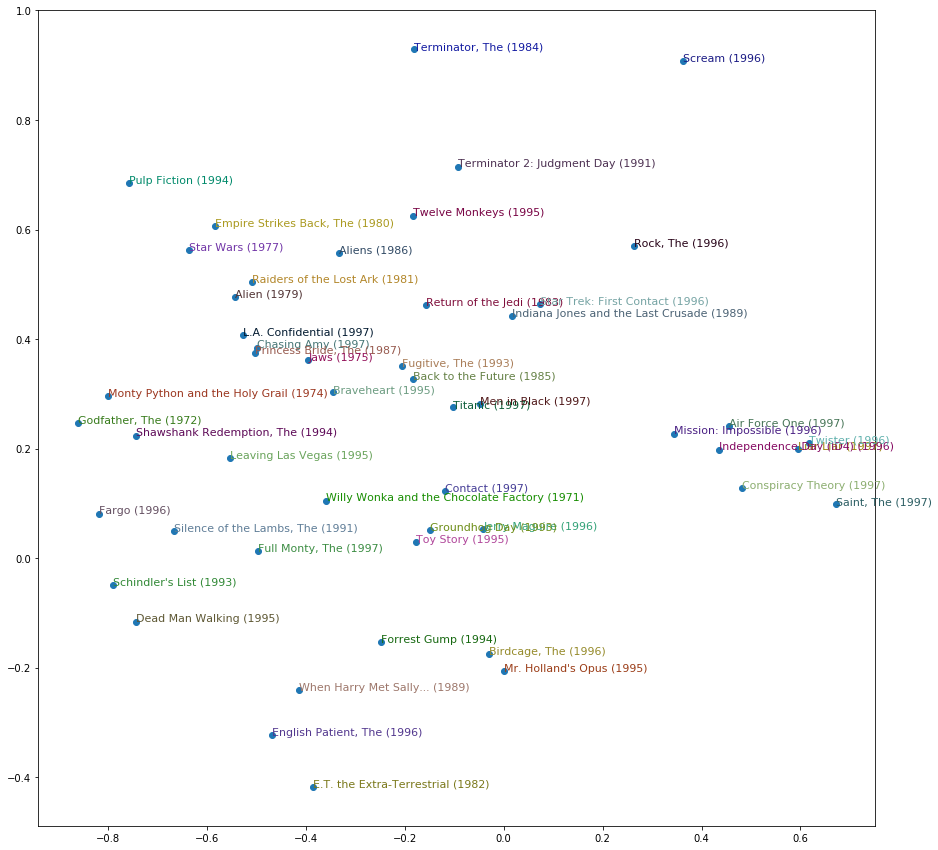

In [53]:
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x, y, i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()